In [12]:
import os,glob # interact with the filesystem
from subprocess import Popen, PIPE, STDOUT  # enable calling commandline
import matplotlib.pyplot as plt  # manipulate figures
import seaborn as sns  # display results
import pandas as pd   # manipulate tabular 
import warnings
import time
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=ResourceWarning) 

In [7]:
#data_dir = '/projects/niblab/bids_projects/Experiments/Bevel/testing_beta' #RENCI PATH
data_dir = '/Users/nikkibytes/Documents/niblunc/sub-001' #LOCAL PATH
print('Our working directory: {}'.format(data_dir))
func_dir = os.path.join(data_dir, "func")
print('Our functional directory: ',func_dir)


Our working directory: /Users/nikkibytes/Documents/niblunc/sub-001
Our functional directory:  /Users/nikkibytes/Documents/niblunc/sub-001/func


In [29]:
import glob#corr_mat_path = func_dir
trial_types = ['punish','reward']
filename_template = "sub-001_task-prob_run-1_bold_space-MNI152NLin2009cAsym_preproc_trialtype-{trial_type}_matrix.tsv"
pd_dict = {}
tsvs = glob.glob(os.path.join(func_dir, "*.tsv"))
#print(tsvs)
for tsv in tsvs:
    print("FILENAME: {}\n".format(tsv))
    pd_dict[trial_type] = pd.read_csv(tsv, sep='\t', na_values="n/a", index_col=0)
# display example matrix
    #print(pd_dict[trial_type].head())
    print("MAX VALUE: {}".format(pd_dict[trial_type].max().max()))
    print("MIN VALUE: {}\n".format(pd_dict[trial_type].min().min()))


FILENAME: /Users/nikkibytes/Documents/niblunc/sub-001/func/sub-001_task-prob_run-3_bold_space-MNI152NLin2009cAsym_preproc_trialtype-punish_matrix.tsv

MAX VALUE: 16.966720094385277
MIN VALUE: -16.923214405890466

FILENAME: /Users/nikkibytes/Documents/niblunc/sub-001/func/sub-001_task-prob_run-1_bold_space-MNI152NLin2009cAsym_preproc_trialtype-reward_matrix.tsv

MAX VALUE: 2.5582442517823685
MIN VALUE: -1.7795896314895832

FILENAME: /Users/nikkibytes/Documents/niblunc/sub-001/func/sub-001_task-prob_run-3_bold_space-MNI152NLin2009cAsym_preproc_trialtype-reward_matrix.tsv

MAX VALUE: 2.1039412209526187
MIN VALUE: -1.7366155864491843

FILENAME: /Users/nikkibytes/Documents/niblunc/sub-001/func/sub-001_task-prob_run-1_bold_space-MNI152NLin2009cAsym_preproc_trialtype-punish_matrix.tsv

MAX VALUE: 2.925119989407226
MIN VALUE: -1.994714790047316

FILENAME: /Users/nikkibytes/Documents/niblunc/sub-001/func/sub-001_task-prob_run-2_bold_space-MNI152NLin2009cAsym_preproc_trialtype-reward_matrix.tsv


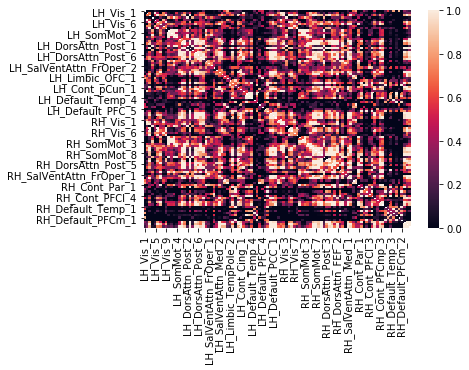

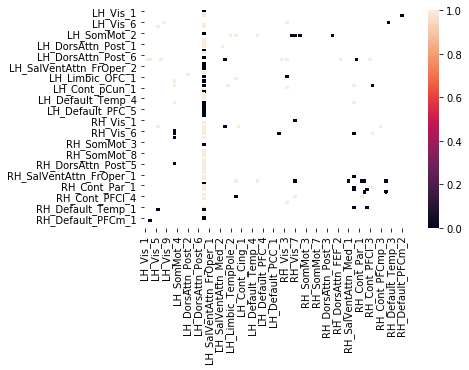

In [18]:
#fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(10, 30),
                         #gridspec_kw={'wspace': 0.025, 'hspace': 0.075})

#cbar_ax = fig.add_axes([.91, .3, .03, .4])

for trial_type, df in pd_dict.items():
    r = 0
    g = sns.heatmap(df, vmin=0, vmax=1)
    axes[r].set_title(trial_type)
    plt.show()

    

In [ ]:


fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(10, 30),
                         gridspec_kw={'wspace': 0.025, 'hspace': 0.075})

cbar_ax = fig.add_axes([.91, .3, .03, .4])

for trial_type, df in pd_dict.items():
    r = 0
    g = sns.heatmap(df, ax=axes[r], vmin=-.5, vmax=1., square=True,
                    cbar=True, cbar_ax=cbar_ax)
    axes[r].set_title(trial_type)
    # iterate over rows
    r += 1
#plt.tight_layout()
plt.savefig(os.path.join(out_dir, "test_subject_plt1.png"))
